<a href="https://colab.research.google.com/github/laliali20/DSI_Twist3/blob/main/DSITwist3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal And Description

The objective of the project is to collect data regarding United States major political players - Joe Biden and Donald Trump. Given the political climate, it seemed interesting to compare the perception of these two in the present moment. The question sought to be answered in this project is how does the coverage of these two feature in the recorded data available and how is the tone towards them. This is interesting because it the tonw towards a political candidate helps determine the chance of their political victory. The data is sourced from Gdelt. Here, due to the huge and complex dataset which uses a lot of reference codes and inconsistent formatting the project posed a major challenge

In [ ]:
!pip install gdelt

In [ ]:
import requests
import lxml.html as lh

gdelt_base_url = 'http://data.gdeltproject.org/events/'

# get the list of all the links on the gdelt file page
page = requests.get(gdelt_base_url+'index.html')
doc = lh.fromstring(page.content)
link_list = doc.xpath("//*/ul/li/a/@href")

# separate out those links that begin with four digits 
file_list = [x for x in link_list if str.isdigit(x[0:4])]

In [ ]:
infilecounter = 0
outfilecounter = 0

In [ ]:
# import os.path
# import urllib
# import zipfile
# import glob
# import operator

# local_path = '/Users/me/Desktop/GDELT_Data/'

# fips_country_code = 'UK'

# for compressed_file in file_list[infilecounter:]:
#     print(compressed_file)
    
#     # if we dont have the compressed file stored locally, go get it. Keep trying if necessary.
#     while not os.path.isfile(local_path+compressed_file): 
#         print('downloading...')
#         urllib.request.urlopen(gdelt_base_url+compressed_file)
#         # urllib.request(url=gdelt_base_url+compressed_file,filename=local_path+compressed_file)
        
#     # extract the contents of the compressed file to a temporary directory    
#     print('extracting..')
#     z = zipfile.ZipFile(file=local_path+compressed_file, mode='r')    
#     z.extractall(path=local_path+'tmp/')
    
#     # parse each of the csv files in the working directory, 
#     print('parsin...'),
#     for infile_name in glob.glob(local_path+'tmp/*'):
#         outfile_name = local_path+'country/'+fips_country_code+'%04i.tsv'%outfilecounter
        
#         # open the infile and outfile
#         with open(infile_name, mode='r') as infile, open(outfile_name, mode='w') as outfile:
#             for line in infile:
#                 # extract lines with our interest country code
#                 if fips_country_code in operator.itemgetter(51, 37, 44)(line.split('\t')):    
#                     outfile.write(line)
#             outfilecounter +=1
            
#         # delete the temporary file
#         os.remove(infile_name)
#     infilecounter +=1
#     print('done')

In [ ]:
# import glob
# import pandas as pd

# # Get the GDELT field names from a helper file
# colnames = pd.read_excel('CSV.header.fieldids.xlsx', sheetname='Sheet1', 
#                          index_col='Column ID', parse_cols=1)['Field Name']

# # Build DataFrames from each of the intermediary files
# files = glob.glob(local_path+'country/'+fips_country_code+'*')
# DFlist = []
# for active_file in files:
#     print active_file
#     DFlist.append(pd.read_csv(active_file, sep='\t', header=None, dtype=str,
#                               names=colnames, index_col=['GLOBALEVENTID']))

# # Merge the file-based dataframes and save a pickle
# DF = pd.concat(DFlist)
# DF.to_pickle(local_path+'backup'+fips_country_code+'.pickle')    
    
# # once everythin is safely stored away, remove the temporary files
# for active_file in files:
#     os.remove(active_file)

In [ ]:
import gdelt
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = '16'

from IPython.display import display

gd2 = gdelt.gdelt(version = 2)

In [ ]:
# Modifying display options of inline pandas dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [ ]:
# Querying
# Defining seach date
query_date1 = '2022 03 01' 
query_date2 = '2022 04 10'

#query_date = '2022 02 24'

In [ ]:
# Querying the events table
result_events_main = gd2.Search([query_date1], table = 'events', coverage = True, translation=True)
result_events_main.head()

/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1031039517,20210301,202103,2021,2021.1671,MEX,TIJUANA,MEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,071,Provide economic aid,071,07,2,7.4,8,1,8,0.663717,2,"California, United States",US,USCA,NaN,36.1700,-119.7460,CA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"California, United States",US,USCA,NaN,36.1700,-119.7460,CA,20220301001500,https://zetatijuana.com/2022/02/infonavit-otor...
1,1031039518,20220130,202201,2022,2022.0822,GOVMIL,DEPARTMENT OF DEFENSE,NaN,NaN,NaN,NaN,NaN,GOV,MIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,084,"Return, release, not specified below",084,08,2,7.0,10,1,10,0.292826,1,Ukraine,UP,UP,NaN,49.0000,32.0000,UP,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Ukraine,UP,UP,NaN,49.0000,32.0000,UP,20220301001500,https://www.news1.kr/articles/?4600556
2,1031039519,20220130,202201,2022,2022.0822,PRK,PYONGYANG,PRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,193,Fight with small arms and light weapons,193,19,4,-10.0,10,1,10,0.292826,4,"Pyongyang, P'yongyang-si, North Korea",KN,KN12,39681,39.0194,125.7550,-183459,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,South Korea,KS,KS,NaN,37.0000,127.5000,KS,20220301001500,https://www.news1.kr/articles/?4600556
3,1031039520,20220222,202202,2022,2022.1425,RUS,RUSSIA,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,127,"Reject accusation, deny responsibility",127,12,3,-5.0,16,2,16,-4.166692,4,"Rossiya, Orenburgskaya Oblast', Russia",RS,RS55,25084,52.4000,54.9833,-2993111,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Rossiya, Orenburgskaya Oblast', Russia",RS,RS55,25084,52.4000,54.9833,-2993111,20220301001500,https://diario.mx/internacional/urge-mexico-ce...
4,1031039521,20220222,202202,2022,2022.1425,USACOP,UNITED STATES,USA,NaN,NaN,NaN,NaN,COP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,173,"Arrest, detain, or charge with legal action",173,17,4,-5.0,2,1,2,-7.474747,3,"Washington, District of Columbia, United States",US,USDC,DC001,38.8951,-77.0364,531871,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"Washington, District of Columbia, United States",US,USDC,DC001,38.8951,-77.0364,531871,20220301001500,https://proceso.hn/comienza-el-primer-juicio-c...


In [ ]:
# USA Gov Related content
result_events = result_events_main[result_events_main['ActionGeo_FullName'].str.contains('United States', na=False)]
result_events.tail(5)


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
80319,1031266332,20220301,202203,2022,2022.1671,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUS,RUSSIAN,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,166,"Impose embargo, boycott, or sanctions",166,16,4,-7.0,8,1,8,-5.044248,3,"Washington, District of Columbia, United States",US,USDC,DC001,38.895100,-77.0364,531871,4,"Moscow, Moskva, Russia",RS,RS48,25106,55.752200,37.6156,-2960561,3,"Washington, District of Columbia, United States",US,USDC,DC001,38.895100,-77.0364,531871,20220301234500,https://www.alquds.co.uk/%D9%85%D9%84%D8%AE%D8...
80321,1031266334,20220301,202203,2022,2022.1671,USAGOV,JOE BIDEN,USA,NaN,NaN,NaN,NaN,GOV,NaN,NaN,LEG,CONGRESS,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,1,051,Praise or endorse,051,05,1,3.4,10,1,10,-1.831502,3,"Houston, Texas, United States",US,USTX,TX201,29.763300,-95.3633,1380948,3,"Houston, Texas, United States",US,USTX,TX201,29.763300,-95.3633,1380948,3,"Houston, Texas, United States",US,USTX,TX201,29.763300,-95.3633,1380948,20220301234500,https://www.francetvinfo.fr/live/message/621/e...
80322,1031266335,20220301,202203,2022,2022.1671,USAGOV,THE WHITE HOUSE,USA,NaN,NaN,NaN,NaN,GOV,NaN,NaN,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,010,"Make statement, not specified below",010,01,1,0.0,2,1,2,-4.545455,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,28554,50.433300,30.5167,-1044367,1,United States,US,US,NaN,39.828175,-98.5795,US,1,United States,US,US,NaN,39.828175,-98.5795,US,20220301234500,https://www.telecinco.es/informativos/internac...
80323,1031266336,20220301,202203,2022,2022.1671,USAGOV,THE WHITE HOUSE,USA,NaN,NaN,NaN,NaN,GOV,NaN,NaN,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,060,"Engage in material cooperation, not spec below",060,06,2,6.0,2,1,2,-4.545455,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,28554,50.433300,30.5167,-1044367,1,United States,US,US,NaN,39.828175,-98.5795,US,1,United States,US,US,NaN,39.828175,-98.5795,US,20220301234500,https://www.telecinco.es/informativos/internac...
80324,1031266337,20220301,202203,2022,2022.1671,USAGOV,THE WHITE HOUSE,USA,NaN,NaN,NaN,NaN,GOV,NaN,NaN,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,060,"Engage in material cooperation, not spec below",060,06,2,6.0,8,1,8,-4.545455,1,United States,US,US,NaN,39.828175,-98.5795,US,1,United States,US,US,NaN,39.828175,-98.5795,US,1,United States,US,US,NaN,39.828175,-98.5795,US,20220301234500,https://www.telecinco.es/informativos/internac...


In [ ]:
# Querying the mentions 
result_mentions = gd2.Search([query_date1], table = 'mentions')
result_mentions.head(5)

/usr/local/lib/python3.7/dist-packages/gdelt/base.py:623: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  results = _mp_worker(self.download_list, proxies=self.proxies)


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,1031264641,20220301234500,20220301234500,1,artnet.com,https://news.artnet.com/art-world/babyn-yar-bo...,9,2611,2671,2621,0,30,4716,-8.808290,NaN,NaN
1,1031264642,20220301234500,20220301234500,1,artnet.com,https://news.artnet.com/art-world/babyn-yar-bo...,9,2611,2671,2660,0,30,4716,-8.808290,NaN,NaN
2,1031264643,20220301234500,20220301234500,1,pauldavisoncrime.com,http://www.pauldavisoncrime.com/search/label/w...,4,-1,1053,1193,1,80,2041,-11.111111,NaN,NaN
3,972116096,20210301060000,20220301234500,1,pauldavisoncrime.com,http://www.pauldavisoncrime.com/search/label/w...,4,-1,1053,1193,0,20,2041,-11.111111,NaN,NaN
4,972126188,20210301071500,20220301234500,1,hawkcentral.com,https://www.hawkcentral.com/story/news/local/2...,7,-1,2592,2584,1,50,6803,-1.711712,NaN,NaN


In [ ]:
result_gkg = gd2.Search([query_date1], table = 'gkg')
result_gkg.head(5)

/usr/local/lib/python3.7/dist-packages/gdelt/base.py:623: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  results = _mp_worker(self.download_list, proxies=self.proxies)


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,20220301234500-0,20220301234500,1,kvnf.org,https://www.kvnf.org/2022-03-01/big-oil-compan...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_RUSSIAN;TAX_WORLDL...,"EPU_CATS_REGULATION,154;TAX_ETHNICITY_RUSSIAN,...",1#Russia#RS#RS#60#100#RS,1#Russian#RS#RS##60#100#RS#86,NaN,NaN,shell,"Shell,20","-3.2258064516129,0,3.2258064516129,3.225806451...",NaN,"wc:23,c1.2:1,c12.1:2,c12.10:2,c12.12:1,c12.13:...",NaN,NaN,NaN,NaN,NaN,NaN,"1000000000,of dollars,120;",NaN,<PAGE_LINKS>https://www.npr.org</PAGE_LINKS><P...
1,20220301234500-1,20220301234500,1,13newsnow.com,https://www.13newsnow.com/article/features/13n...,NaN,NaN,UNGP_FORESTS_RIVERS_OCEANS;ENV_CLIMATECHANGE;W...,"NATURAL_DISASTER_FLOODED,586;CRISISLEX_C06_WAT...",NaN,NaN,james hansen,"James Hansen,1306",united nations,"United Nations,1627","-1.22324159021407,0.305810397553517,1.52905198...",1#0#0#1996#211;1#0#0#1988#1125;1#0#0#1996#1152...,"wc:290,c1.3:23,c12.1:15,c12.10:27,c12.12:6,c12...",https://media.13newsnow.com/assets/WVEC/images...,NaN,NaN,https://youtube.com/embed/OuG-X0cs4iM?rel=0;,NaN,"Now Vault,18;Hampton Roads,419;Virginia Beach,...","3,times the global pace,454;",NaN,<PAGE_LINKS>https://www.13newsnow.com/article/...
2,20220301234500-2,20220301234500,1,journalpatriot.com,https://www.journalpatriot.com/commissioners-t...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_COMMISSIONERS;TAX_FNCACT...,"GENERAL_GOVERNMENT,1202;GENERAL_GOVERNMENT,129...",NaN,NaN,keith elmore,"Keith Elmore,1112",vannoy construction co;wilkes department of so...,"Vannoy Construction Co,98;Wilkes Department Of...","2.27272727272727,2.27272727272727,0,2.27272727...",NaN,"wc:207,c12.1:5,c12.10:9,c12.12:1,c12.13:4,c12....",https://bloximages.newyork1.vip.townnews.com/j...,NaN,NaN,NaN,NaN,"Wilkes County,18;Vannoy Construction,96;Vannoy...",NaN,NaN,<PAGE_AUTHORS>STAFF REPORT</PAGE_AUTHORS><PAGE...
3,20220301234500-3,20220301234500,1,wfmz.com,https://www.wfmz.com/news/biden-in-state-of-th...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7659;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.875,3.046875,4.921875,7.96875,25.234375,0.3...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/w...,NaN,NaN,https://youtube.com/c/69NewsWFMZTV;https://you...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...
4,20220301234500-4,20220301234500,1,kacu.org,https://www.kacu.org/2022-03-01/putins-claim-o...,"KILL#20000##4#Babyn, Ivano-frankivs'ka Oblast'...","KILL#20000##4#Babyn, Ivano-frankivs'ka Oblast'...",TAX_ETHNICITY;TAX_ETHNICITY_RUSSIAN;TAX_WORLDL...,"IDEOLOGY,6302;ARMEDCONFLICT,73;ARMEDCONFLICT,9...","4#Babyn, Ivano-Frankivs'ka Oblast', Ukraine#UP...",1#Russia#RS#RS##60#100#RS#94;1#Russia#RS#RS##6...,stepan bandera;volodymyr groysman;olga maltsev...,"Stepan Bandera,1492;Volodymyr Groysman,5621;Ol...",russian mission in geneva;brandeis university;...,"Russian Mission In Geneva,532;Brandeis Univers...","-5.43311122501281,2.05023065094823,7.483341875...",1#0#0#2014#5129,"wc:1721,c1.4:4,c12.1:129,c12.10:160,c12.12:75,...",https://media.npr.org/assets/img/2022/03/01/ge...,https://media.npr.org/assets/img/2022/03/01/ge...,NaN

In [ ]:
len(result_events.columns)

62

In [ ]:
result_gkg.AllNames.head(5)

0                                                  NaN
1    Now Vault,18;Hampton Roads,419;Virginia Beach,...
2    Wilkes County,18;Vannoy Construction,96;Vannoy...
3    President Joe Biden,40;Vladimir Putin,72;Russi...
4    Updated March,14;President Vladimir Putin,74;W...
Name: AllNames, dtype: object

In [ ]:
# data preprocessing
rgkg = result_gkg.query("Locations.str.contains('Israel') or V2Locations.str.contains('IL#')", engine = "python")

rgkg.head(5)

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
52,20220301234500-52,20220301234500,1,prnewswire.com,https://www.prnewswire.com:443/news-releases/t...,NaN,NaN,TAX_DISEASE;TAX_DISEASE_CANCER;WB_1406_DISEASE...,"CRISISLEX_CRISISLEXREC,1735;TAX_FNCACT_SUPPORT...","2#Illinois, United States#US#USIL#40.3363#-89....","2#Illinois, United States#US#USIL##40.3363#-89...",ann widman;jennifer hatten;julie ferguson;jake...,"Ann Widman,601;Jennifer Hatten,914;Julie Fergu...",super jake foundation,"Super Jake Foundation,62;Super Jake Foundation...","1.61290322580645,7.25806451612903,5.6451612903...",4#2#12#0#288;1#0#0#2005#483;2#2#0#2005#2042;3#...,"wc:321,c12.1:30,c12.10:42,c12.12:20,c12.13:11,...",NaN,NaN,NaN,NaN,NaN,"Super Jake Foundation,66;Super Jake Red Carpet...","400,dollars ,210;200,silent auction items,347;...",NaN,<PAGE_AUTHORS>The Super Jake Foundation</PAGE_...
60,20220301234500-60,20220301234500,1,caledonianrecord.com,https://www.caledonianrecord.com/news/national...,KILL#33##1#Israel#IS#IS#31.5#34.75#IS;TERROR#3...,KILL#33##1#Israel#IS#IS#31.5#34.75#IS#13621;TE...,ARMEDCONFLICT;EPU_CATS_NATIONAL_SECURITY;TAX_P...,"ACT_MAKESTATEMENT,10888;ARMEDCONFLICT,48;ARMED...","4#Moscow, Moskva, Russia#RS#RS48#55.7522#37.61...",1#Russia#RS#RS##60#100#RS#310;1#Russia#RS#RS##...,yair lapid;melanie joly;vjosa osmani-sadriu;jo...,"Yair Lapid,13405;Melanie Joly,12119;Vjosa Osma...",google;twitter;u s energy;human rights council...,"Google,2379;Google,3157;Twitter,2389;Human Rig...","-3.45727332028702,1.98956294846706,5.446836268...",4#3#7#0#9676;4#3#8#0#9758;4#3#14#0#11063;1#0#0...,"wc:2791,c1.1:2,c1.2:5,c1.3:1,c1.4:1,c12.1:140,...",https://bloximages.newyork1.vip.townnews.com/c...,NaN,NaN,NaN,1408|32||pay a price for their aggression#7738...,"President Joe Biden,144;Kevin Stitt,501;Rob Po...","10000,of thousands of barrels,786;3,months of ...",NaN,<PAGE_LINKS>https://apnews.com/article/russia-...
71,20220301234500-71,20220301234500,1,kstp.com,https://kstp.com/kstp-news/top-news/mlb-cancel...,NaN,NaN,NaN,NaN,"3#Miami, Florida, United States#US#USFL#25.774...","3#Dodger Stadium, California, United States#US...",andrew miller;shohei ohtani;gerrit cole;rob ma...,"Andrew Miller,4323;Shohei Ohtani,3811;Gerrit C...",associated press;major league baseball,"Associated Press,2764;Associated Press,4043;As...","-3.51985559566787,2.88808664259928,6.407942238...",4#3#31#0#390;2#11#0#2013#2566;1#0#0#1973#4633;...,"wc:961,c1.2:3,c1.3:1,c12.1:66,c12.10:103,c12.1...",https://kstp.com/wp-content/uploads/AP/Lockout...,NaN,NaN,https://youtube.com/channel/UCVBmhZPjBx0DsvQKQ...,NaN,"Major League Baseball,52;Commissioner Rob Manf...","2,series of the season,292;162,games,360;156,g...",NaN,<PAGE_LINKS>https://twitter.com/Lorenzen55/sta...
82,20220301234500-82,20220301234500,1,grandrapidsmn.com,https://www.grandrapidsmn.com/opinion/kids-tal...,"KILL#5##4#Capernaum, Ha?afon, Israel#IS#IS03#3...","KILL#5##4#Capernaum, Ha?afon, Israel#IS#IS03#3...",EPU_ECONOMY_HISTORIC;TAX_WORLDMAMMALS;TAX_WORL...,"TAX_WORLDMAMMALS_HORSE,1827;TAX_FNCACT_LEADERS...","4#Jerusalem, Israel (General), Israel#IS#IS00#...","4#Jerusalem, Israel (General), Israel#IS#IS00#...",apostle peter;jesus christ,"Apostle Peter,1372;Jesus Christ,3086;Jesus Chr...",NaN,NaN,"3.08441558441558,6.81818181818182,3.7337662337...",NaN,"wc:567,c1.4:4,c12.1:95,c12.10:60,c12.12:16,c12...",https://bloximages.chicago2.vip.townnews.com/g...,NaN,NaN,https://youtube.com/GRheraldreview;,"1521|38||walking , leaping , and praising God#...","Cat Miracle,171;After Jesus,1014;Jesus Christ,...",NaN,NaN,<PAGE_PRECISEPUBTIMESTAMP>20220301211900</PAGE...
152,20220301234500-152,20220301234500,1,canadafreepress.com,https://canadafreepress.com/article/recall-on-...,NaN,NaN,

In [ ]:
result_gkg_2 = result_gkg.query("Locations.str.contains('United States') or Locations.str.contains('USA') or V2Locations.str.contains('United States#') or V2Locations.str.contains('US#')", engine = "python")
result_gkg_2.head(10)

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
3,20220301234500-3,20220301234500,1,wfmz.com,https://www.wfmz.com/news/biden-in-state-of-th...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7659;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.875,3.046875,4.921875,7.96875,25.234375,0.3...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/w...,NaN,NaN,https://youtube.com/c/69NewsWFMZTV;https://you...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...
4,20220301234500-4,20220301234500,1,kacu.org,https://www.kacu.org/2022-03-01/putins-claim-o...,"KILL#20000##4#Babyn, Ivano-frankivs'ka Oblast'...","KILL#20000##4#Babyn, Ivano-frankivs'ka Oblast'...",TAX_ETHNICITY;TAX_ETHNICITY_RUSSIAN;TAX_WORLDL...,"IDEOLOGY,6302;ARMEDCONFLICT,73;ARMEDCONFLICT,9...","4#Babyn, Ivano-Frankivs'ka Oblast', Ukraine#UP...",1#Russia#RS#RS##60#100#RS#94;1#Russia#RS#RS##6...,stepan bandera;volodymyr groysman;olga maltsev...,"Stepan Bandera,1492;Volodymyr Groysman,5621;Ol...",russian mission in geneva;brandeis university;...,"Russian Mission In Geneva,532;Brandeis Univers...","-5.43311122501281,2.05023065094823,7.483341875...",1#0#0#2014#5129,"wc:1721,c1.4:4,c12.1:129,c12.10:160,c12.12:75,...",https://media.npr.org/assets/img/2022/03/01/ge...,https://media.npr.org/assets/img/2022/03/01/ge...,NaN,https://youtube.com/channel/UCknoNH2fZ7YihGeyg...,7618|32||simply a mythical use of history,"Updated March,14;President Vladimir Putin,74;W...","10000,of thousands of Jews,1608;6000000,Jewish...",NaN,<PAGE_LINKS>https://jewishjournal.com/news/wor...
5,20220301234500-5,20220301234500,1,britainnews.net,https://www.britainnews.net/news/272349347/des...,NaN,NaN,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_RUSSIA;E...,"WB_1751_LIQUEFIED_NATURAL_GAS,2475;CRISISLEX_C...",1#Germany#GM#GM#51.5#10.5#GM;1#United States#U...,1#Russia#RS#RS##60#100#RS#62;1#Russia#RS#RS##6...,douglas rediker;eamon ryan;timm kehler;olaf sc...,"Douglas Rediker,1194;Eamon Ryan,756;Timm Kehle...",zukunft gas association;brookings institution;...,"Zukunft Gas Association,1893;Brookings Institu...","-1,1,2,3,23.5714285714286,2.42857142857143,651",NaN,"wc:651,c1.2:4,c1.3:8,c12.1:28,c12.10:57,c12.12...",https://cdn.bignewsnetwork.com/voa1646168765.jpg,NaN,NaN,NaN,NaN,"Eamon Ryan,797;Douglas Rediker,1264;Washington...","100000000,of millions of dollars,53;1000000,of...",NaN,"<PAGE_TITLE>Despite Sanctions, Europe Continue..."
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggressi

In [ ]:
result_gkg_2.Persons.head(25)

3     jason dearen;jill biden;ketanji brown jackson;...
4     stepan bandera;volodymyr groysman;olga maltsev...
5     douglas rediker;eamon ryan;timm kehler;olaf sc...
6     donald trump;rob manfred;henry cuellar;joe bid...
8     dirk meyer;rondo capriccioso;samuel coleridge ...
11                      kirill dmitriev;alexei nikolsky
13    jason dearen;jill biden;ketanji brown jackson;...
15                   tim walz;jesse ventura;cory hepola
16                                            joe biden
18    jill biden;melissa isaac;jonathan nez;chuck ho...
21    marco rubio;jill biden;ketanji brown jackson;k...
24    donald trump;robin vos;michael gableman;tim ra...
28                            camila cabello;ed sheeran
29                             los angeles;thomas insel
34                       michael gregory;tamika mallory
36                                                  NaN
37                                                  NaN
45                            camila cabello;ed 

In [ ]:
# Extracting data on biden
# Extracting Tone column's list to new columns
biden = result_gkg.query("Persons.str.contains('Joe Biden') or V2Persons.str.contains('Biden')", engine = "python") # or AllNames.str.contains('Le Pen')
biden.head()


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
3,20220301234500-3,20220301234500,1,wfmz.com,https://www.wfmz.com/news/biden-in-state-of-th...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7659;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.875,3.046875,4.921875,7.96875,25.234375,0.3...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/w...,NaN,NaN,https://youtube.com/c/69NewsWFMZTV;https://you...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...
13,20220301234500-13,20220301234500,1,smdailyjournal.com,https://www.smdailyjournal.com/news/national/b...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7685;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.87061574434918,3.03975058456742,4.910366328...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/s...,NaN,NaN,https://youtube.com/channel/UC-zb8PjbryhPA4TmI...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...
16,20220301234500-16,20220301234500,1,fox6now.com,https://www.fox6now.com/news/womens-history-mo...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_WOMEN;ALLIANCE;TAX_FNCAC...,"EDUCATION,1250;SOC_POINTSOFINTEREST_COLLEGES,1...",1#United States#US#US#39.828175#-98.5795#US,1#American#US#US##39.828175#-98.5795#US#1233;1...,joe biden,"Joe Biden,2052",victoria secret;association of american medica...,"Victoria Secret,622;Association Of American Me...","2.51141552511416,3.88127853881279,1.3698630136...",1#0#0#1981#1446;3#3#7#1982#1507;1#0#0#1987#168...,"wc:371,c1.2:3,c1.4:1,c12.1:20,c12.10:23,c12.12...",https://images.foxtv.com/static.fox6now.com/ww...,NaN,NaN,https://youtube.com/fox6milwaukee?sub_confirma...,NaN,"History Month,30;National W

In [ ]:
# Extracting data on trump
# Extracting Tone column's list to new columns
trump = result_gkg.query("Persons.str.contains('Donald Trump') or V2Persons.str.contains('Trump')", engine = "python") # or AllNames.str.contains('Le Pen')
trump.head()

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...
24,20220301234500-24,20220301234500,1,journaltimes.com,https://journaltimes.com/news/local/neubauer-w...,NaN,NaN,USPEC_POLITICS_GENERAL1;TAX_POLITICAL_PARTY;TA...,"TAX_POLITICAL_PARTY_REPUBLICANS,1658;UNGP_FORE...","2#Wisconsin, United States#US#USWI#44.2563#-89...","2#Wisconsin, United States#US#USWI##44.2563#-8...",donald trump;robin vos;michael gableman;tim ra...,"Donald Trump,1434;Robin Vos,1753;Robin Vos,275...",assembly minority leader greta neubauer;wiscon...,"Assembly Minority Leader Greta Neubauer,407;Wi...","-0.584795321637427,1.94931773879142,2.53411306...",4#3#8#0#2496,"wc:456,c12.1:24,c12.10:41,c12.12:9,c12.13:20,c...",https://bloximages.chicago2.vip.townnews.com/j...,NaN,NaN,NaN,NaN,"Michael Gableman,229;Assembly Minority Leader ...","676,dollars ,1777;1000000000,dollars ,1924;150...",NaN,<PAGE_LINKS>https://madison.com/news/local/gov...
62,20220301234500-62,20220301234500,1,washingtontimes.com,https://www.washingtontimes.com:443/news/2022/...,NaN,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"TAX_FNCACT_CANDIDATES,316;TAX_FNCACT_CANDIDATE...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",matt dolan;donald trump;eric greitens;vicky ha...,"Matt Dolan,3332;Donald Trump,58;Donald Trump,4...",ohio senate;senate minority leader mitch mccon...,"Ohio Senate,3152;Senate Minority Leader Mitch ...","0.568181818181818,2.61363636363636,2.045454545...",NaN,"wc:809,c12.1:71,c12.10:48,c12.12:22,c12.13:18,...",NaN,NaN,NaN,NaN,415|151||My question is simple : can I count o...,"Josh Mandel,12;President Donald Trump,59;Presi...",NaN,NaN,<PAGE_AUTHORS>The Washington Times https://www...
78,20220301234500-78,20220301234500,1,krdo.com,https://krdo.com/politics/cnn-us-politics/2022...,NaN,NaN,TAX_POLITICAL_PARTY;TAX_POLITICAL_PARTY_REPUBL...,"TAX_FNCACT_CONGRESSMAN,2643;RECRUITMENT,4484;T...","1#Mexico#MX#MX#23#-102#MX;2#Arizona, United St...","1#Russia#RS#RS##60#100#RS#541;2#Texas, United ...",van taylor;maeve reston;donald trump;henry cue...,"Van Taylor,8344;Maeve Reston,31;Donald Trump,1...",republican party;senate republicans;warnermedi...,"Republican Party,1874;Senate Republicans,8544;...","-1.76506390748631,2.43457090687766,4.199634814...",4#2#14#0#716;4#1#6#0#8599,"wc:1498,c12.1:89,c12.10:135,c12.12:35,c12.13:6...",https://krdo.b-cdn.net/2022/03/hypatia-h_5cffc...,NaN,NaN,NaN,NaN,"Gregory Krieg,17;Maeve Reston,34;President Joe...","2,Latina GOP candidates #x2014,5009;3,points o...",NaN,<PAGE_LINKS>http://www.cnn.com/2022/02/19/poli...
156,20220301234500-156,20220301234500,1,smdailyjournal.com,https://www.smdailyjournal.com/news/national/c...,NaN,NaN,TRIAL;TAX_FNCACT;TAX_FNCACT_ATTORNEY;WB_696_PU...,"TAX_FNCACT_DIRECTOR,2659;TAX_FNCACT_CANDIDATE,...","2#California, United States#US

In [ ]:
# Extracting Tone column's list to new columns - biden
biden[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(biden["V2Tone"].str.split(",").tolist(), index = biden.index)
biden["Tone"] = biden["Tone"].astype("float")
biden.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount
3,20220301234500-3,20220301234500,1,wfmz.com,https://www.wfmz.com/news/biden-in-state-of-th...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7659;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.875,3.046875,4.921875,7.96875,25.234375,0.3...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/w...,NaN,NaN,https://youtube.com/c/69NewsWFMZTV;https://you...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...,-1.875000,3.046875,4.921875,7.96875,25.234375,0.3125,1187
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...,-5.536481,1.80257510729614,7.33905579399142,9.14163090128755,20.9012875536481,0.386266094420601,2101
13,20220301234500-13,20220301234500,1,smdailyjournal.com,https://www.smdailyjournal.com/news/national/b...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7685;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.87061574434918,3.03975058456742,4.910366328...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/s...,NaN,NaN,https://youtube.com/channel/UC-zb8PjbryhPA4TmI...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...,-1.870616,3.03975058456742,4.9103663289166,7.95011691348402,25.1753702260327,0.311769290724864,1187
16,20220301234500-16,20220301234500,1,fox6now.com,https://www.fox6now.com/news/womens-history-mo...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_WOMEN;ALLIANCE;TAX_FNCAC...,"EDUCATION,1250;SOC_POINTSOFINTEREST_COLLEGES,1...",1#United States#US#US#39.828175#-98.5795#US,1#American#US#US##39.828175#-98.5795#US#1233;1...,joe biden,"Joe Biden,2052",victoria secret;association of american med

In [ ]:
# Extracting Tone column's list to new columns
trump[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(biden["V2Tone"].str.split(",").tolist(), index = biden.index)
trump["Tone"] = trump["Tone"].astype("float")
trump.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...,-5.536481,1.80257510729614,7.33905579399142,9.14163090128755,20.9012875536481,0.386266094420601,2101
24,20220301234500-24,20220301234500,1,journaltimes.com,https://journaltimes.com/news/local/neubauer-w...,NaN,NaN,USPEC_POLITICS_GENERAL1;TAX_POLITICAL_PARTY;TA...,"TAX_POLITICAL_PARTY_REPUBLICANS,1658;UNGP_FORE...","2#Wisconsin, United States#US#USWI#44.2563#-89...","2#Wisconsin, United States#US#USWI##44.2563#-8...",donald trump;robin vos;michael gableman;tim ra...,"Donald Trump,1434;Robin Vos,1753;Robin Vos,275...",assembly minority leader greta neubauer;wiscon...,"Assembly Minority Leader Greta Neubauer,407;Wi...","-0.584795321637427,1.94931773879142,2.53411306...",4#3#8#0#2496,"wc:456,c12.1:24,c12.10:41,c12.12:9,c12.13:20,c...",https://bloximages.chicago2.vip.townnews.com/j...,NaN,NaN,NaN,NaN,"Michael Gableman,229;Assembly Minority Leader ...","676,dollars ,1777;1000000000,dollars ,1924;150...",NaN,<PAGE_LINKS>https://madison.com/news/local/gov...,-0.584795,1.94931773879142,2.53411306042885,4.48343079922027,23.1968810916179,0.584795321637427,456
62,20220301234500-62,20220301234500,1,washingtontimes.com,https://www.washingtontimes.com:443/news/2022/...,NaN,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"TAX_FNCACT_CANDIDATES,316;TAX_FNCACT_CANDIDATE...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",matt dolan;donald trump;eric greitens;vicky ha...,"Matt Dolan,3332;Donald Trump,58;Donald Trump,4...",ohio senate;senate minority leader mitch mccon...,"Ohio Senate,3152;Senate Minority Leader Mitch ...","0.568181818181818,2.61363636363636,2.045454545...",NaN,"wc:809,c12.1:71,c12.10:48,c12.12:22,c12.13:18,...",NaN,NaN,NaN,NaN,415|151||My question is simple : can I count o...,"Josh Mandel,12;President Donald Trump,59;Presi...",NaN,NaN,<PAGE_AUTHORS>The Washington Times https://www...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,20220301234500-78,20220301234500,1,krdo.com,https://krdo.com/politics/cnn-us-politics/2022...,NaN,NaN,TAX_POLITICAL_PARTY;TAX_POLITICAL_PARTY_REPUBL...,"TAX_FNCACT_CONGRESSMAN,2643;RECRUITMENT,4484;T...","1#Mexico#MX#MX#23#-102#MX;2#Arizona, United St...","1#Russia#RS#RS##60#100#RS#541;2#Texas, United ...",van taylor;maeve reston;donald trump;henry cue...,"Van Taylor,8344;Maeve Reston,31;Donald Trump,1...",republican party;senate republicans;warnermedi...,"Republican Party,1874;Senate Republicans,8544;...","-1.76506390748631,2.43457090687766,4.199634814...",4#2#14#0#716;4#1#6#0#8599,"wc:1498,c12.1:89,c12.10:135,c12.12:35,c12.13:6...",https://krdo.b-cdn.net/2022/03/hypatia-h_5cffc...,NaN,NaN,NaN,NaN,"Gregory Krieg,17;Maeve Reston,34;President Joe...","2,Latina GOP candidates #x2014,5

In [ ]:
biden["Locations"].fillna("####0#0#", inplace = True)
biden["Country"] = biden["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[2])
biden["District"] = biden["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[3])
biden.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount,Country,District
3,20220301234500-3,20220301234500,1,wfmz.com,https://www.wfmz.com/news/biden-in-state-of-th...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7659;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.875,3.046875,4.921875,7.96875,25.234375,0.3...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/w...,NaN,NaN,https://youtube.com/c/69NewsWFMZTV;https://you...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...,-1.875000,3.046875,4.921875,7.96875,25.234375,0.3125,1187,US,USNY
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...,-5.536481,1.80257510729614,7.33905579399142,9.14163090128755,20.9012875536481,0.386266094420601,2101,US,USGA
13,20220301234500-13,20220301234500,1,smdailyjournal.com,https://www.smdailyjournal.com/news/national/b...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,WOUND#19#pandemic continues#1#Russia#RS#RS#60#...,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"ARMEDCONFLICT,2507;EPU_CATS_NATIONAL_SECURITY,...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",jason dearen;jill biden;ketanji brown jackson;...,"Jason Dearen,7685;Jill Biden,2195;Ketanji Brow...",supreme court;white house;associated press;cnn...,"Supreme Court,6921;White House,892;White House...","-1.87061574434918,3.03975058456742,4.910366328...",NaN,"wc:1187,c1.2:4,c1.3:4,c12.1:91,c12.10:124,c12....",https://bloximages.newyork1.vip.townnews.com/s...,NaN,NaN,https://youtube.com/channel/UC-zb8PjbryhPA4TmI...,6010|38||will absolutely use the word inflation,"President Joe Biden,40;Vladimir Putin,72;Russi...","12,lawmakers,3511;2000000000000,bipartisan inf...",NaN,<PAGE_LINKS>https://apnews.com/article/Ketanji...,-1.870616,3.03975058456742,4.9103663289166,7.95011691348402,25.1753702260327,0.311769290724864,1187,US,USNY
16,20220301234500-16,20220301234500,1,fox6now.com,https://www.fox6now.com/news/womens-history-mo...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_WOMEN;ALLIANCE;TAX_FNCAC...,"EDUCATION,1250;SOC_POINTSOFINTEREST_COLLEGES,1...",1#United States#US#US#39.828175#-98.5795#US,1#American#US#US##39.828175#-98.5795#US#1233;1...,joe biden,"Joe Biden,2052",vi

In [ ]:
trump["Locations"].fillna("####0#0#", inplace = True)
trump["Country"] = trump["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[2])
trump["District"] = trump["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[3])
trump.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount,Country,District
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...,-5.536481,1.80257510729614,7.33905579399142,9.14163090128755,20.9012875536481,0.386266094420601,2101,US,USGA
24,20220301234500-24,20220301234500,1,journaltimes.com,https://journaltimes.com/news/local/neubauer-w...,NaN,NaN,USPEC_POLITICS_GENERAL1;TAX_POLITICAL_PARTY;TA...,"TAX_POLITICAL_PARTY_REPUBLICANS,1658;UNGP_FORE...","2#Wisconsin, United States#US#USWI#44.2563#-89...","2#Wisconsin, United States#US#USWI##44.2563#-8...",donald trump;robin vos;michael gableman;tim ra...,"Donald Trump,1434;Robin Vos,1753;Robin Vos,275...",assembly minority leader greta neubauer;wiscon...,"Assembly Minority Leader Greta Neubauer,407;Wi...","-0.584795321637427,1.94931773879142,2.53411306...",4#3#8#0#2496,"wc:456,c12.1:24,c12.10:41,c12.12:9,c12.13:20,c...",https://bloximages.chicago2.vip.townnews.com/j...,NaN,NaN,NaN,NaN,"Michael Gableman,229;Assembly Minority Leader ...","676,dollars ,1777;1000000000,dollars ,1924;150...",NaN,<PAGE_LINKS>https://madison.com/news/local/gov...,-0.584795,1.94931773879142,2.53411306042885,4.48343079922027,23.1968810916179,0.584795321637427,456,US,USWI
62,20220301234500-62,20220301234500,1,washingtontimes.com,https://www.washingtontimes.com:443/news/2022/...,NaN,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"TAX_FNCACT_CANDIDATES,316;TAX_FNCACT_CANDIDATE...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",matt dolan;donald trump;eric greitens;vicky ha...,"Matt Dolan,3332;Donald Trump,58;Donald Trump,4...",ohio senate;senate minority leader mitch mccon...,"Ohio Senate,3152;Senate Minority Leader Mitch ...","0.568181818181818,2.61363636363636,2.045454545...",NaN,"wc:809,c12.1:71,c12.10:48,c12.12:22,c12.13:18,...",NaN,NaN,NaN,NaN,415|151||My question is simple : can I count o...,"Josh Mandel,12;President Donald Trump,59;Presi...",NaN,NaN,<PAGE_AUTHORS>The Washington Times https://www...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,USNY
78,20220301234500-78,20220301234500,1,krdo.com,https://krdo.com/politics/cnn-us-politics/2022...,NaN,NaN,TAX_POLITICAL_PARTY;TAX_POLITICAL_PARTY_REPUBL...,"TAX_FNCACT_CONGRESSMAN,2643;RECRUITMENT,4484;T...","1#Mexico#MX#MX#23#-102#MX;2#Arizona, United St...","1#Russia#RS#RS##60#100#RS#541;2#Texas, United ...",van taylor;maeve reston;donald trump;henry cue...,"Van Taylor,8344;Maeve Reston,31;Donald Trump,1...",republican party;senate republicans;warnermedi...,"Republican Party,1874;Senate Republicans,8544;...","-1.76506390748631,2.43457090687766,4.199634814...",4#2#14#0#716;4#1#6#0#8599,"wc:1498,c12.1:89,c12.10:135,c12.12:35,c12.13:6...",https://krdo.b-cdn.net/2022/03/hypatia-h_5cffc...,NaN,NaN,NaN,NaN,"Gregory Krieg,17;Maeve Reston,34;President 

In [ ]:
biden_2 = biden[biden["Country"] == "US"].reset_index()
biden_3 = biden_2.groupby(["DATE", "District"]).agg(news_count = ("DATE", "count"), news_tone = ("Tone", "mean")).reset_index()

In [ ]:
trump_2 = trump[trump["Country"] == "US"].reset_index()
trump_3 = trump_2.groupby(["DATE", "District"]).agg(news_count = ("DATE", "count"), news_tone = ("Tone", "mean")).reset_index()

In [ ]:
trump.head()

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount,Country,District
6,20220301234500-6,20220301234500,1,siouxcityjournal.com,https://siouxcityjournal.com/news/national/ap-...,NaN,NaN,LEADER;,"LEADER,156;LEADER,371;LEADER,1060;LEADER,1151;...","2#Georgia, United States#US#USGA#32.9866#-83.6...",1#Russia#RS#RS##60#100#RS#2410;1#Russia#RS#RS#...,donald trump;rob manfred;henry cuellar;joe bid...,"Donald Trump,6826;Donald Trump,12245;Rob Manfr...",emory university;white house;seattle harborvie...,"Emory University,13512;White House,5957;Seattl...","-5.53648068669528,1.80257510729614,7.339055793...",1#0#0#1941#1764;4#3#31#0#10299;4#5#24#0#13268,"wc:2101,c1.1:3,c1.2:3,c1.3:10,c12.1:155,c12.10...",https://bloximages.chicago2.vip.townnews.com/s...,NaN,NaN,NaN,223|32||pay a price for their aggression,"President Joe Biden,143;Russian President Vlad...","5,people were killed,1035;100,of Russian tanks...",NaN,<PAGE_AUTHORS>AP</PAGE_AUTHORS><PAGE_PRECISEPU...,-5.536481,1.80257510729614,7.33905579399142,9.14163090128755,20.9012875536481,0.386266094420601,2101,US,USGA
24,20220301234500-24,20220301234500,1,journaltimes.com,https://journaltimes.com/news/local/neubauer-w...,NaN,NaN,USPEC_POLITICS_GENERAL1;TAX_POLITICAL_PARTY;TA...,"TAX_POLITICAL_PARTY_REPUBLICANS,1658;UNGP_FORE...","2#Wisconsin, United States#US#USWI#44.2563#-89...","2#Wisconsin, United States#US#USWI##44.2563#-8...",donald trump;robin vos;michael gableman;tim ra...,"Donald Trump,1434;Robin Vos,1753;Robin Vos,275...",assembly minority leader greta neubauer;wiscon...,"Assembly Minority Leader Greta Neubauer,407;Wi...","-0.584795321637427,1.94931773879142,2.53411306...",4#3#8#0#2496,"wc:456,c12.1:24,c12.10:41,c12.12:9,c12.13:20,c...",https://bloximages.chicago2.vip.townnews.com/j...,NaN,NaN,NaN,NaN,"Michael Gableman,229;Assembly Minority Leader ...","676,dollars ,1777;1000000000,dollars ,1924;150...",NaN,<PAGE_LINKS>https://madison.com/news/local/gov...,-0.584795,1.94931773879142,2.53411306042885,4.48343079922027,23.1968810916179,0.584795321637427,456,US,USWI
62,20220301234500-62,20220301234500,1,washingtontimes.com,https://www.washingtontimes.com:443/news/2022/...,NaN,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"TAX_FNCACT_CANDIDATES,316;TAX_FNCACT_CANDIDATE...","2#New York, United States#US#USNY#42.1497#-74....","3#Capitol Hill, District Of Columbia, United S...",matt dolan;donald trump;eric greitens;vicky ha...,"Matt Dolan,3332;Donald Trump,58;Donald Trump,4...",ohio senate;senate minority leader mitch mccon...,"Ohio Senate,3152;Senate Minority Leader Mitch ...","0.568181818181818,2.61363636363636,2.045454545...",NaN,"wc:809,c12.1:71,c12.10:48,c12.12:22,c12.13:18,...",NaN,NaN,NaN,NaN,415|151||My question is simple : can I count o...,"Josh Mandel,12;President Donald Trump,59;Presi...",NaN,NaN,<PAGE_AUTHORS>The Washington Times https://www...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,USNY
78,20220301234500-78,20220301234500,1,krdo.com,https://krdo.com/politics/cnn-us-politics/2022...,NaN,NaN,TAX_POLITICAL_PARTY;TAX_POLITICAL_PARTY_REPUBL...,"TAX_FNCACT_CONGRESSMAN,2643;RECRUITMENT,4484;T...","1#Mexico#MX#MX#23#-102#MX;2#Arizona, United St...","1#Russia#RS#RS##60#100#RS#541;2#Texas, United ...",van taylor;maeve reston;donald trump;henry cue...,"Van Taylor,8344;Maeve Reston,31;Donald Trump,1...",republican party;senate republicans;warnermedi...,"Republican Party,1874;Senate Republicans,8544;...","-1.76506390748631,2.43457090687766,4.199634814...",4#2#14#0#716;4#1#6#0#8599,"wc:1498,c12.1:89,c12.10:135,c12.12:35,c12.13:6...",https://krdo.b-cdn.net/2022/03/hypatia-h_5cffc...,NaN,NaN,NaN,NaN,"Gregory Krieg,17;Maeve Reston,34;President 

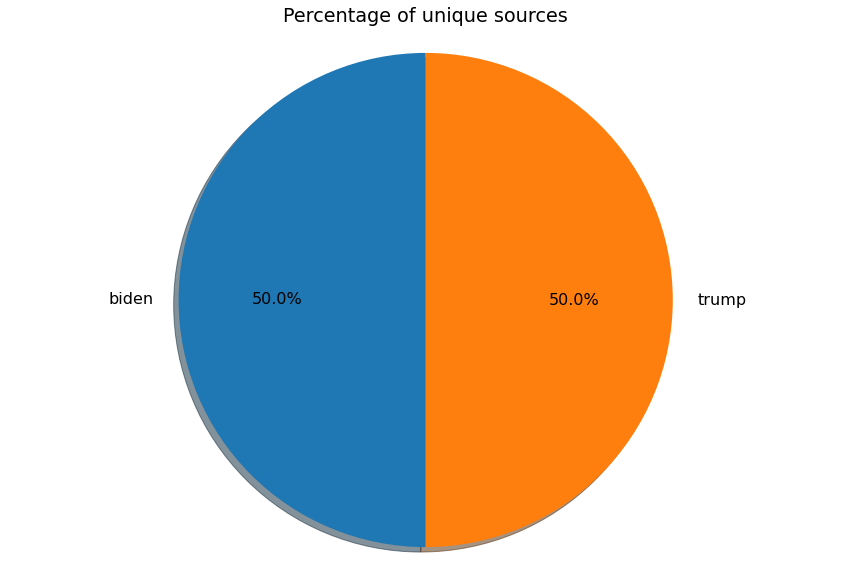

In [ ]:
# Plotting the percentage of unique sources between the two election years in a pie chart
labels = 'biden', 'trump'
total_sources = biden.SourceCommonName.nunique() + trump.SourceCommonName.nunique()
sizes = [biden.SourceCommonName.nunique()/total_sources,biden.SourceCommonName.nunique()/total_sources]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of unique sources')
plt.show()

In [ ]:
biden_avg = biden.mean()


trump_data = trump["Tone"]
biden_data = biden["Tone"]
index = ["Tone"]
df_comparison = pd.DataFrame({'trump': trump_data, 'biden': biden_data})
df_comparison.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,trump,biden
3,NaN,-1.875000
6,-5.536481,-5.536481
13,NaN,-1.870616
16,NaN,2.511416
18,NaN,0.819672


Text(0, 0.5, 'Result')

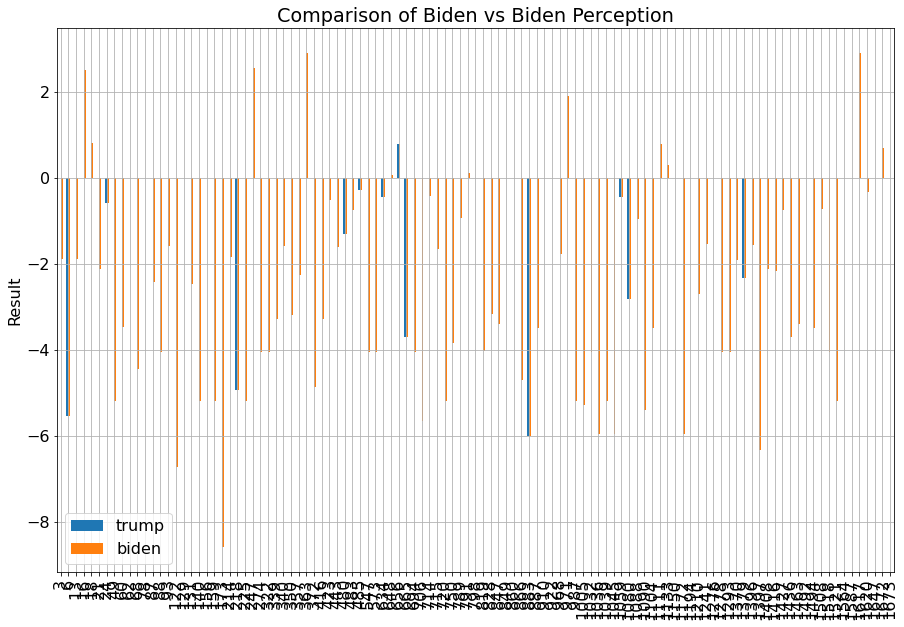

In [ ]:
ax = df_comparison.plot.bar(title='Comparison of Biden vs Biden Perception', grid=True)
plt.ylabel("Result")

In [ ]:
# Plotting the coverage
trump_wc = [trump["WordCount"]]
biden_wc = [biden["WordCount"]]
index = ["WordCount"]
df_wc_comparison = pd.DataFrame({'Trump': mean(trump_wc), 'Biden': mean(biden_wc)})
df_wc_comparison.head()


NameError: ignored

In [ ]:
df_wc_comparison = pd.DataFrame({'Trump': trump_wc, 'Biden': biden_wc})

In [ ]:
ax = df_wc_comparison.plot.bar(title='Word Coverage comparison Trump vs Biden', grid=True)
#ax.set_xlabel("x label")
plt.ylabel("Word Coverage")